### Importing neccessary libraries

In [1]:
import pandas
import numpy as np
import pandas as pd
from itertools import groupby
import gc
import pickle

- Reading the test data file.

In [2]:
df = pd.read_csv('testfile.csv')

We have few features so for inference we are making new features we we've used in model training.

In [3]:
features = []
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)

In [4]:
df['timestamp'] = df['timestamp'].dt.tz_localize(None)

In [5]:
df["hour"] = df["timestamp"].dt.hour
features.append("hour")

In [6]:
periods = 20

Additional anglez features

In [7]:
df["anglez"] = abs(df["anglez"])
df["anglez_diff"] = df.groupby('series_id')['anglez'].diff(periods=periods).fillna(method="bfill").astype('float16')
df["anglez_rolling_mean"] = df["anglez"].rolling(periods,center=True).mean().fillna(method="bfill").fillna(method="ffill").astype('float16')
df["anglez_rolling_max"] = df["anglez"].rolling(periods,center=True).max().fillna(method="bfill").fillna(method="ffill").astype('float16')
df["anglez_rolling_std"] = df["anglez"].rolling(periods,center=True).std().fillna(method="bfill").fillna(method="ffill").astype('float16')
df["anglez_diff_rolling_mean"] = df["anglez_diff"].rolling(periods,center=True).mean().fillna(method="bfill").fillna(method="ffill").astype('float16')
df["anglez_diff_rolling_max"] = df["anglez_diff"].rolling(periods,center=True).max().fillna(method="bfill").fillna(method="ffill").astype('float16')
features.extend(["anglez", "anglez_rolling_mean", "anglez_rolling_max", "anglez_rolling_std", "anglez_diff", "anglez_diff_rolling_mean", "anglez_diff_rolling_max"])

Additiona Enmo features

In [8]:
df["enmo_diff"] = df.groupby('series_id')['enmo'].diff(periods=periods).fillna(method="bfill").astype('float16')
df["enmo_rolling_mean"] = df["enmo"].rolling(periods,center=True).mean().fillna(method="bfill").fillna(method="ffill").astype('float16')
df["enmo_rolling_max"] = df["enmo"].rolling(periods,center=True).max().fillna(method="bfill").fillna(method="ffill").astype('float16')
df["enmo_rolling_std"] = df["enmo"].rolling(periods,center=True).std().fillna(method="bfill").fillna(method="ffill").astype('float16')
df["enmo_diff_rolling_mean"] = df["enmo_diff"].rolling(periods,center=True).mean().fillna(method="bfill").fillna(method="ffill").astype('float16')
df["enmo_diff_rolling_max"] = df["enmo_diff"].rolling(periods,center=True).max().fillna(method="bfill").fillna(method="ffill").astype('float16')
features.extend(["enmo","enmo_rolling_mean", "enmo_rolling_max","enmo_rolling_std","enmo_diff","enmo_diff_rolling_mean", "enmo_diff_rolling_max"])

In [9]:
test_df = df

In [10]:
X_test = test_df[features]
y_test = test_df['awake']

- Loading the model which is saved with pickel

In [11]:
filename = "model_2.sav"
loaded_model = pickle.load(open(filename, 'rb'))
predicted_y_test = loaded_model.predict(X_test)
test_df['predicated_awake'] = predicted_y_test

In [12]:
# Filtering one day data to view and predict the data
temp = df[(df['timestamp'] > '2017-11-09') & (df['timestamp'] < '2017-11-11')]

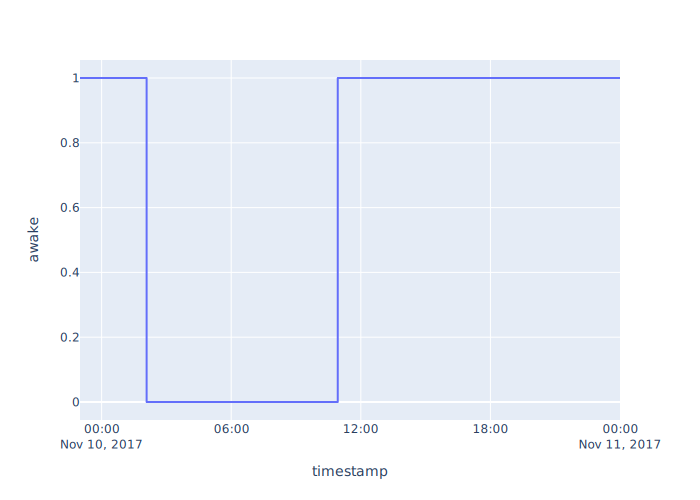

In [16]:
import plotly.express as px

fig = px.line(temp, x='timestamp', y="awake")
fig.show("svg")

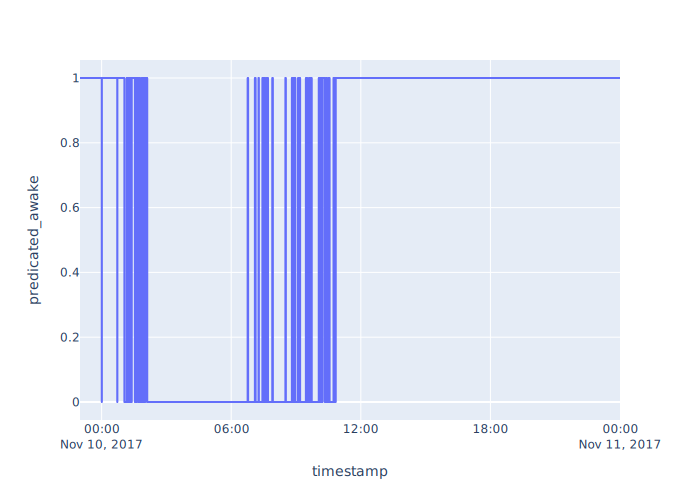

In [14]:
import plotly.express as px

fig = px.line(temp, x='timestamp', y="predicated_awake")
fig.show("svg")

As we can see in the test data the model is able to predict the sleeping and awake state but in the initial and later stages it is getting difficult for the model to predict, may be with the more data training model might be able to predict more accurately.